<a href="https://colab.research.google.com/github/yelenana/machine_learning/blob/main/Rybchynska_Olena__%22HW_2_2_%D0%9B%D0%BE%D0%B3%D1%96%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B7_scikit_learn_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle - шукайте посилання в уроці [Запрошення до участі у Kaggle-змаганні.](https://data-loves.kwiga.com/courses/machine-learning-dlia-liudei/domashnie-zavdannia-zmagannia-z-kaggle) Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.



---



In [163]:
!pip install opendatasets --upgrade --quiet

In [164]:
import opendatasets as od

In [165]:
od.version()

'0.1.22'

In [166]:
dataset_url = 'https://www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling/sample_data'

In [253]:
od.download(dataset_url)


Skipping, found downloaded files in "./bank-customer-churn-modeling" (use force=True to force download)


In [254]:
import os

In [255]:
!ls

bank-customer-churn-modeling  log_reg.joblib
logistic_regression_data      sample_data


In [256]:
data_dir = './bank-customer-churn-modeling'

In [257]:
os.listdir(data_dir)

['Churn_Modelling.csv']

In [258]:
train_csv = data_dir + '/Churn_Modelling.csv'

Завантажимо дані за допомогою Pandas

In [259]:
import pandas as pd

In [260]:
raw_df=pd.read_csv(train_csv)

In [261]:
raw_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [262]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Бачимо, що всі наші дані заповнені, нама строчок зі значенням NA



---



2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.



---



In [263]:
from sklearn.model_selection import train_test_split

In [264]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [265]:
print ('train_df',train_df.shape)
print ('val_df',val_df.shape)
print ('test_df',test_df.shape)

train_df (6000, 14)
val_df (2000, 14)
test_df (2000, 14)


Створюємо список вхідних  стовпців і цільової змінної

In [266]:
input_cols = list(train_df.columns)[3:-1]
target_col = 'Exited'

Перші 3 колонки не включаємо, бо це не має смислу

In [267]:
print(input_cols)
print(target_col)

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Exited


Створюємо набори вхідних даних і цільових значень для навчального, тестового та валідаційного набору

In [268]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [269]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [270]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()



---



3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.



---



In [271]:
import numpy as np

In [272]:
train_inputs.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8588,712,Spain,Female,29,7,77919.78,1,1,0,122547.58
3178,542,France,Female,39,4,109949.39,2,1,1,41268.65
5200,512,Germany,Male,42,9,93955.83,2,1,0,14828.54
8889,580,France,Female,39,9,128362.59,1,1,0,86044.98
5789,689,Germany,Female,55,1,76296.81,1,1,0,42364.75


In [273]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [274]:
numeric_cols, categorical_cols

(['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary'],
 ['Geography', 'Gender'])

In [275]:
train_inputs[numeric_cols].describe( ).round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00
mean,651.82,38.93,4.98,76243.29,1.53,0.70,0.52,100165.21
std,96.06,10.47,2.88,62554.34,0.58,0.46,0.50,57403.88
min,350.00,18.00,0.00,0.00,1.00,0.00,0.00,90.07
25%,585.00,32.00,2.00,0.00,1.00,0.00,0.00,51200.71
50%,653.00,37.00,5.00,96340.90,1.00,1.00,1.00,99923.06
75%,718.00,44.00,7.00,127639.37,2.00,1.00,1.00,149369.79
max,850.00,83.00,10.00,238387.56,4.00,1.00,1.00,199970.74


In [276]:
train_inputs[categorical_cols].nunique()

,0
Geography,3
Gender,2


4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.



---
1. Самим першим етапом підготовки даних було вилучення з розгляду стовпців  RowNumber,	CustomerId,	Surname,бо вони не несуть для подальшого аналізу ніякого смислового навантаження
2. Наступний необхідний крок: оцифрувати категріальні ознаки, а це в нас Geography та Gender


In [277]:
gender_codes = {'Female': 0, 'Male': 1}
train_inputs['Gender'] = train_inputs['Gender'].map(gender_codes)
val_inputs['Gender'] = val_inputs['Gender'].map(gender_codes)
test_inputs['Gender'] = test_inputs['Gender'].map(gender_codes)

Так як гендер перевели у числовий вигляд, то перевизначимо числові і категоріальні ознаки

In [278]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [279]:
numeric_cols

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [280]:
categorical_cols

['Geography']

In [281]:
train_inputs.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8588,712,Spain,0,29,7,77919.78,1,1,0,122547.58
3178,542,France,0,39,4,109949.39,2,1,1,41268.65
5200,512,Germany,1,42,9,93955.83,2,1,0,14828.54
8889,580,France,0,39,9,128362.59,1,1,0,86044.98


Бачимо що кореляція між гендером та нашим таргетом незначна, але все ж таки цікаво буде проаналізувати, як це буде впливати на загальну модель.

In [282]:
train_inputs.Gender.corr(train_targets)

np.float64(-0.09839805430342302)

Переведемо також у числові значення стовпчика Geography

In [283]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder(sparse_output=False)
enc.fit(train_inputs[['Geography']])
enc.categories_


[array(['France', 'Germany', 'Spain'], dtype=object)]

In [290]:
one_hot = enc.transform(train_inputs[['Geography']])
train_inputs[enc.categories_[0]] = one_hot
train_inputs

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
8588,0.724,Spain,0.0,0.169231,0.7,0.326862,0.000000,1.0,0.0,0.612653,0.0,0.0,1.0
3178,0.384,France,0.0,0.323077,0.4,0.461221,0.333333,1.0,1.0,0.206016,1.0,0.0,0.0
5200,0.324,Germany,1.0,0.369231,0.9,0.394131,0.333333,1.0,0.0,0.073736,0.0,1.0,0.0
8889,0.460,France,0.0,0.323077,0.9,0.538462,0.000000,1.0,0.0,0.430031,1.0,0.0,0.0
5789,0.678,Germany,0.0,0.569231,0.1,0.320054,0.000000,1.0,0.0,0.211500,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8871,0.232,France,0.0,0.184615,0.3,0.000000,0.000000,1.0,0.0,0.970051,1.0,0.0,0.0
9826,0.878,Spain,0.0,0.338462,0.4,0.000000,0.333333,1.0,0.0,0.686971,0.0,0.0,1.0
5268,0.682,France,1.0,0.153846,0.1,0.000000,0.333333,0.0,0.0,0.464154,1.0,0.0,0.0
9666,0.816,Spain,1.0,0.261538,0.5,0.000000,0.333333,1.0,0.0,0.474881,0.0,0.0,1.0


In [291]:
one_hot = enc.transform(val_inputs[['Geography']])
val_inputs[enc.categories_[0]] = one_hot
val_inputs.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
3188,0.902,France,0.0,0.215385,0.4,0.315329,0.000000,1.0,1.0,0.189155,1.0,0.0,0.0
8293,0.832,Germany,0.0,0.153846,0.4,0.380459,0.000000,0.0,1.0,0.107600,0.0,1.0,0.0
1710,0.956,Spain,1.0,0.153846,0.8,0.565327,0.000000,1.0,0.0,0.396566,0.0,0.0,1.0
7510,0.896,France,1.0,0.276923,0.1,0.000000,0.333333,1.0,1.0,0.795245,1.0,0.0,0.0
1461,0.522,Spain,1.0,0.246154,0.4,0.000000,0.333333,1.0,0.0,0.854813,0.0,0.0,1.0


In [292]:
one_hot = enc.transform(test_inputs[['Geography']])
test_inputs[enc.categories_[0]] = one_hot
test_inputs.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
6252,0.492,Germany,1.0,0.215385,0.3,0.405680,0.333333,0.0,0.0,0.208616,0.0,1.0,0.0
4684,0.546,France,1.0,0.384615,0.1,0.000000,0.333333,1.0,1.0,0.731883,1.0,0.0,0.0
1731,0.502,Spain,0.0,0.400000,0.4,0.000000,0.333333,1.0,0.0,0.292531,0.0,0.0,1.0
4742,0.312,Germany,1.0,0.630769,0.8,0.499825,0.333333,1.0,1.0,0.853458,0.0,1.0,0.0
4521,0.420,Spain,0.0,0.138462,0.7,0.524339,0.000000,1.0,1.0,0.573241,0.0,0.0,1.0


Промасштабуємо дані

In [293]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_inputs[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [294]:
train_inputs[numeric_cols].describe().round(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00
mean,0.60,0.54,0.32,0.50,0.32,0.18,0.70,0.52,0.50
std,0.19,0.50,0.16,0.29,0.26,0.19,0.46,0.50,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.47,0.00,0.22,0.20,0.00,0.00,0.00,0.00,0.26
50%,0.61,1.00,0.29,0.50,0.40,0.00,1.00,1.00,0.50
75%,0.74,1.00,0.40,0.70,0.54,0.33,1.00,1.00,0.75
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00




---



5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`



---



In [295]:
!pip install pandas pyarrow --quiet

In [296]:
output_dir = 'logistic_regression_data'
os.makedirs(output_dir, exist_ok=True)

In [297]:
train_inputs.to_parquet(os.path.join(output_dir, 'train_inputs.parquet'))
val_inputs.to_parquet(os.path.join(output_dir, 'val_inputs.parquet'))
test_inputs.to_parquet(os.path.join(output_dir, 'test_inputs.parquet'))

In [298]:
%%time
pd.DataFrame(train_targets).to_parquet(os.path.join(output_dir, 'train_targets.parquet'))
pd.DataFrame(val_targets).to_parquet(os.path.join(output_dir, 'val_targets.parquet'))
pd.DataFrame(test_targets).to_parquet(os.path.join(output_dir, 'test_targets.parquet'))

CPU times: user 9.95 ms, sys: 987 µs, total: 10.9 ms
Wall time: 11.7 ms


In [299]:
print(f"\nВміст папки '{output_dir}':")
print(os.listdir(output_dir))


Вміст папки 'logistic_regression_data':
['train_inputs.parquet', 'val_inputs.parquet', 'test_targets.parquet', 'train_targets.parquet', 'val_targets.parquet', 'test_inputs.parquet']


In [300]:
train_inputs = pd.read_parquet(os.path.join(output_dir, 'train_inputs.parquet'))
val_inputs = pd.read_parquet(os.path.join(output_dir, 'val_inputs.parquet'))
test_inputs = pd.read_parquet(os.path.join(output_dir, 'test_inputs.parquet'))

train_targets = pd.read_parquet(os.path.join(output_dir, 'train_targets.parquet'))
val_targets = pd.read_parquet(os.path.join(output_dir, 'val_targets.parquet'))
test_targets = pd.read_parquet(os.path.join(output_dir, 'test_targets.parquet'))

Подивимось на дані, чи дійсно з ними все в порядку

In [301]:
print('train_inputs',train_inputs.shape)
print('train_targets',train_targets.shape)
print('val_inputs',val_inputs.shape)
print('val_targets',val_targets.shape)
print('test_inputs',test_inputs.shape)
print('test_targets',test_targets.shape)

train_inputs (6000, 13)
train_targets (6000, 1)
val_inputs (2000, 13)
val_targets (2000, 1)
test_inputs (2000, 13)
test_targets (2000, 1)


In [302]:
train_inputs.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
8588,0.724,Spain,0.0,0.169231,0.7,0.326862,0.000000,1.0,0.0,0.612653,0.0,0.0,1.0
3178,0.384,France,0.0,0.323077,0.4,0.461221,0.333333,1.0,1.0,0.206016,1.0,0.0,0.0
5200,0.324,Germany,1.0,0.369231,0.9,0.394131,0.333333,1.0,0.0,0.073736,0.0,1.0,0.0
8889,0.460,France,0.0,0.323077,0.9,0.538462,0.000000,1.0,0.0,0.430031,1.0,0.0,0.0
5789,0.678,Germany,0.0,0.569231,0.1,0.320054,0.000000,1.0,0.0,0.211500,0.0,1.0,0.0


In [303]:
train_targets.head()

,Exited
8588,0
3178,0
5200,0
8889,0
5789,1




---



6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.



---



In [304]:
X_train = train_inputs.drop(columns=['Geography'])

X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
8588,0.724,0.0,0.169231,0.7,0.326862,0.000000,1.0,0.0,0.612653,0.0,0.0,1.0
3178,0.384,0.0,0.323077,0.4,0.461221,0.333333,1.0,1.0,0.206016,1.0,0.0,0.0
5200,0.324,1.0,0.369231,0.9,0.394131,0.333333,1.0,0.0,0.073736,0.0,1.0,0.0
8889,0.460,0.0,0.323077,0.9,0.538462,0.000000,1.0,0.0,0.430031,1.0,0.0,0.0
5789,0.678,0.0,0.569231,0.1,0.320054,0.000000,1.0,0.0,0.211500,0.0,1.0,0.0


In [305]:
X_val= val_inputs.drop(columns=['Geography'])
X_val.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
3188,0.902,0.0,0.215385,0.4,0.315329,0.000000,1.0,1.0,0.189155,1.0,0.0,0.0
8293,0.832,0.0,0.153846,0.4,0.380459,0.000000,0.0,1.0,0.107600,0.0,1.0,0.0
1710,0.956,1.0,0.153846,0.8,0.565327,0.000000,1.0,0.0,0.396566,0.0,0.0,1.0
7510,0.896,1.0,0.276923,0.1,0.000000,0.333333,1.0,1.0,0.795245,1.0,0.0,0.0
1461,0.522,1.0,0.246154,0.4,0.000000,0.333333,1.0,0.0,0.854813,0.0,0.0,1.0


In [307]:
X_test= test_inputs.drop(columns=['Geography'])
X_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
6252,0.492,1.0,0.215385,0.3,0.405680,0.333333,0.0,0.0,0.208616,0.0,1.0,0.0
4684,0.546,1.0,0.384615,0.1,0.000000,0.333333,1.0,1.0,0.731883,1.0,0.0,0.0
1731,0.502,0.0,0.400000,0.4,0.000000,0.333333,1.0,0.0,0.292531,0.0,0.0,1.0
4742,0.312,1.0,0.630769,0.8,0.499825,0.333333,1.0,1.0,0.853458,0.0,1.0,0.0
4521,0.420,0.0,0.138462,0.7,0.524339,0.000000,1.0,1.0,0.573241,0.0,0.0,1.0


Натренуємо модель

In [308]:
from sklearn.linear_model import LogisticRegression

In [309]:
model=LogisticRegression(solver='liblinear')

In [310]:
model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

In [311]:
model.coef_.round(2)

array([[-0.35, -0.49,  4.44, -0.15,  0.58, -0.33, -0.04, -0.98, -0.01,
        -0.8 , -0.02, -0.67]])

In [312]:
train_preds = model.predict(X_train)
train_preds

array([0, 0, 0, ..., 0, 0, 0])



---



7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

---

Confusion matrix:

In [313]:
from sklearn.metrics import confusion_matrix

In [314]:
confusion_matrix(train_targets, train_preds,normalize='true')

array([[0.96917593, 0.03082407],
       [0.80016247, 0.19983753]])

 F1 Score:

In [315]:
from sklearn.metrics import f1_score

In [223]:
preds = model.predict(X_train)
f1_score(train_targets, preds)

0.30295566502463056

AUROC for Training: 0.76


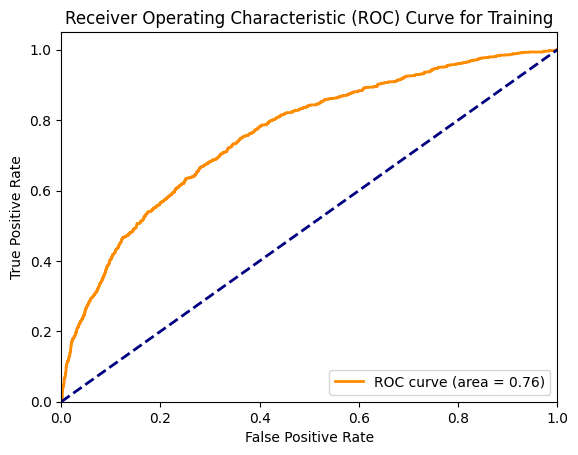

AUROC for Validation: 0.78


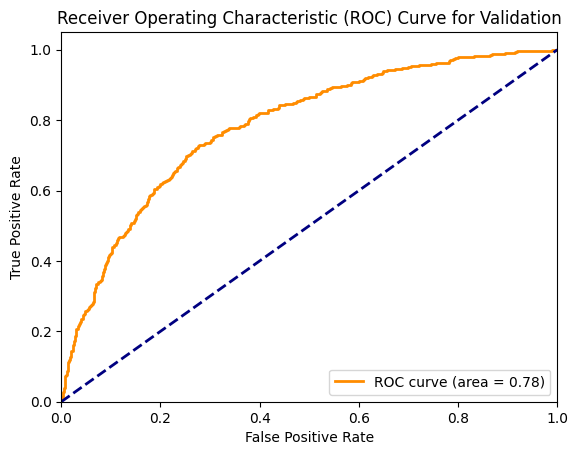

In [316]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

def compute_auroc_and_build_roc(inputs, targets, name=''):
    # Predict probabilities
    y_pred_proba = model.predict_proba(inputs)[:, 1]

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1)

    # Compute AUROC
    roc_auc = auc(fpr, tpr)
    print(f'AUROC for {name}: {roc_auc:.2f}')

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()

# Виклики функції
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

Висновки: Дуже висока специфічність (TN_rate): 96.92% правильно передбачених негативних випадків. Модель чудово ідентифікує, коли подія не відбудеться.

Дуже низька чутливість / повнота (TP_rate / Recall): 19.98% правильно передбачених позитивних випадків. Це означає, що 80.02% фактичних позитивних випадків були хибно класифіковані як негативні (False Negatives). Модель майже повністю пропускає позитивні події.
Модель надзвичайно упереджена до прогнозування негативного класу. Це є результатом сильного дисбалансу класів, де негативний клас є значно поширенішим(див.нижче). Модель "навчилася" мінімізувати помилки, прогнозуючи найчастіший клас.А найчастіший клас у нас це Exited=0 (79%)

In [317]:
train_targets.value_counts(normalize=True)

,proportion
Exited,
0,0.794833
1,0.205167


In [318]:
import pandas as pd
pd.Series(train_preds).value_counts(normalize=True)

,proportion
0,0.9345
1,0.0655


Низьке значення F1-score (0.30) підтверджує, що модель не є ефективною для передбачення позитивного класу. Вона страждає від великої кількості хибно-негативних спрацьовувань (дуже низька повнота), що сильно впливає на F1-score.

F1-score підтверджує проблему, виявлену Confusion matrix: модель нездатна адекватно виявляти позитивні випадки.

AUROC:0.76 для тренувального набору та 0.78 для валідаційного набору є помірними показниками. Те, що AUROC для валідації (0.78) трохи вищий за тренувальний (0.76), може вказувати на відсутність сильного перенавчання (overfitting) і що модель узагальнює досить добре на нових даних.
Загалом: Модель має потенціал для розрізнення класів (AUROC ~0.77 є "нормальним", не ідеальним, але й не випадковим). Однак, модель надто упереджена до прогнозування негативного класу, що робить її неефективною для виявлення позитивних випадків.




---



8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?



---



In [319]:
#Створимо передбачення для "Majority Class Classifier"


In [320]:
majority_class = train_targets.value_counts().idxmax()
print(f"Мажоритарний клас у тренувальних даних: {majority_class}")

Мажоритарний клас у тренувальних даних: (np.int64(0),)


Як вище і було вже розраховано, що Exited=0 (79% даних)

In [321]:
# Для тренувальних даних
majority_train_preds = np.full(len(train_targets), majority_class)

# Для валідаційних даних
majority_val_preds = np.full(len(val_targets), majority_class)

In [322]:
majority_train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [323]:
majority_val_preds

array([0, 0, 0, ..., 0, 0, 0])

In [324]:
# Рахуємо Accuracy для "наївної" моделі (Majority Class Classifier) ---
from sklearn.metrics import accuracy_score
accuracy_majority_train = accuracy_score(train_targets, majority_train_preds)
accuracy_majority_val = accuracy_score(val_targets, majority_val_preds)

In [325]:
accuracy_majority_train

0.7948333333333333

In [326]:
accuracy_majority_val

0.7935

In [327]:
# порівняємо зі значенням для навченої моделі
accuracy_score(train_targets, train_preds)

0.8113333333333334

Висновок; модель, отримана після навчання (0.8113) дещо краща за модель мажоритарного класу(0.7948). Різниця становить близько 1.65%. Той факт, що Majority Class Classifier показує точність майже 80%, знову ж таки підтверджує, що у даних існує сильний дисбаланс класів - мажоритарний становить близько 80% всіх зразків



---



9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).



---



In [328]:
import joblib


In [329]:
churn_prediction_data = {
    'model': model,
    'scaler': scaler,
    'encoder':enc,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
}

In [330]:
joblib.dump(churn_prediction_data, 'log_reg.joblib')

['log_reg.joblib']

In [331]:
data = joblib.load('log_reg.joblib')
model_2 = data['model']
model_2

LogisticRegression(solver='liblinear')

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [332]:
numeric_cols, categorical_cols

(['CreditScore',
  'Gender',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary'],
 ['Geography'])

In [343]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, model, input_df: pd.DataFrame):

    processed_df = input_df.copy()

    # Apply gender mapping
    gender_codes = {'Female': 0, 'Male': 1}
    processed_df['Gender'] = processed_df['Gender'].map(gender_codes)

    # Separate numeric and categorical columns
    numeric_data = processed_df[numeric_cols]
    categorical_data = processed_df[categorical_cols]

    # Scale numeric columns
    scaled_numeric_data = scaler.transform(numeric_data)
    scaled_numeric_df = pd.DataFrame(scaled_numeric_data, index=processed_df.index, columns=numeric_cols)


    # Encode geography column
    encoded_geo_cols_with_prefix = encoder.get_feature_names_out(['Geography'])
    one_hot_geo = encoder.transform(categorical_data[['Geography']])

    rename_dict = {col: col.replace('Geography_', '') for col in encoded_geo_cols_with_prefix}

    # Convert the one-hot encoded array to a DataFrame and rename columns
    one_hot_geo_df = pd.DataFrame(one_hot_geo, index=processed_df.index, columns=encoded_geo_cols_with_prefix).rename(columns=rename_dict)

    combined_processed_df = pd.concat([scaled_numeric_df, one_hot_geo_df], axis=1)

    # Select and reorder columns to match the training data (X_train)
    X_input = combined_processed_df[X_train.columns]

    # Predict probabilities
    prob = model.predict_proba(X_input)[:, 1]
    return prob

In [345]:
input_df_example = raw_df[:5].copy()
probabilities = predict_raw_df(scaler, enc, numeric_cols, categorical_cols, model, input_df_example)
probabilities,

(array([0., 1., 1., 0., 1.]),)

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [346]:
dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-3/data?select=test.csv'

In [347]:
od.download(dataset_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: olenarybchynska
Your Kaggle Key: ··········


100%|██████████| 637k/637k [00:00<00:00, 615MB/s]


Extracting archive ./bank-customer-churn-prediction-dlu-course-c-3/bank-customer-churn-prediction-dlu-course-c-3.zip to ./bank-customer-churn-prediction-dlu-course-c-3


In [348]:
data_dir = './bank-customer-churn-prediction-dlu-course-c-3'

In [349]:
os.listdir(data_dir)

['sample_submission.csv', 'test.csv', 'train.csv']

In [350]:
test_csv_path = data_dir + '/test.csv'

In [351]:
test_raw_df = pd.read_csv(test_csv_path)

In [352]:
test_raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,15642997.0,Chukwumaobim,639.0,Spain,Male,38.0,10.0,0.00,2.0,1.0,1.0,49637.65
9996,24996,15739271.0,Clements,678.0,Spain,Male,39.0,9.0,0.00,2.0,1.0,1.0,142513.50
9997,24997,15756743.0,Chidiebere,774.0,France,Male,30.0,9.0,0.00,2.0,1.0,0.0,4861.72
9998,24998,15680167.0,Yermakova,595.0,France,Male,38.0,6.0,144875.79,1.0,1.0,0.0,126469.09


In [353]:
test_input_df = test_raw_df.copy()
probabilities_test = predict_raw_df(scaler, enc, numeric_cols, categorical_cols, model, test_input_df)
test_raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,15642997.0,Chukwumaobim,639.0,Spain,Male,38.0,10.0,0.00,2.0,1.0,1.0,49637.65
9996,24996,15739271.0,Clements,678.0,Spain,Male,39.0,9.0,0.00,2.0,1.0,1.0,142513.50
9997,24997,15756743.0,Chidiebere,774.0,France,Male,30.0,9.0,0.00,2.0,1.0,0.0,4861.72
9998,24998,15680167.0,Yermakova,595.0,France,Male,38.0,6.0,144875.79,1.0,1.0,0.0,126469.09


In [354]:
test_raw_df['Exited'] = probabilities_test
test_raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86,1.000000e+00
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28,0.000000e+00
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45,0.000000e+00
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87,0.000000e+00
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,15642997.0,Chukwumaobim,639.0,Spain,Male,38.0,10.0,0.00,2.0,1.0,1.0,49637.65,1.316499e-306
9996,24996,15739271.0,Clements,678.0,Spain,Male,39.0,9.0,0.00,2.0,1.0,1.0,142513.50,0.000000e+00
9997,24997,15756743.0,Chidiebere,774.0,France,Male,30.0,9.0,0.00,2.0,1.0,0.0,4861.72,8.964602e-90
9998,24998,15680167.0,Yermakova,595.0,France,Male,38.0,6.0,144875.79,1.0,1.0,0.0,126469.09,1.000000e+00


12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [355]:
submission_file_path = data_dir + '/sample_submission.csv'
submission = pd.read_csv(submission_file_path)
submission['Exited']=probabilities_test
submission.head()

,id,Exited
0,15000,1.0
1,15001,0.0
2,15002,0.0
3,15003,0.0
4,15004,0.0


In [357]:
output_filename = 'submission_log_reg.csv'
submission.to_csv(output_filename, index=False)